<a href="https://colab.research.google.com/github/Fzaplana/Green-Start/blob/master/Hpsp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geocoder

     |████████████████████████████████| 102kB 2.4MB/s 


In [2]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 14.7MB 313kB/s 
     |████████████████████████████████| 10.9MB 52.4MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import os
#os.chdir('/Users/franciscozaplana/Downloads/TESIS')
os.chdir('/content/drive/My Drive/Download/TESIS/')
os.getcwd()

'/content/drive/My Drive/Download/TESIS'

In [6]:
pd.set_option('display.max_columns',50)
pd.get_option("display.max_columns")

50

In [0]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Import Datasets:

Importamos el Dataset extraido de OpenData de Barcelona de los Hospitales y Centros de primera atención.

Solo importamos las columnas mas relevantes para nuestro analisis, las hemos seleccionado previamente.

In [0]:
Hosp = pd.read_csv('S0002_Hospitals_I_dAtencio_Primaria.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11,14,15,16,17,18,19])

In [9]:
# revisamos la cantidad de Columnas cargadas
Hosp.columns.value_counts().sum()

18

In [10]:
Hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CODI_EQUIPAMENT  399 non-null    int64  
 1   EQUIPAMENT       399 non-null    object 
 2   SECCIO           399 non-null    object 
 3   TIPUS_VIA        399 non-null    object 
 4   NOM_CARRER       399 non-null    object 
 5   NUM_CARRER_1     399 non-null    int64  
 6   NUM_CARRER_2     396 non-null    float64
 7   CODI_BARRI       399 non-null    int64  
 8   NUM_BARRI        399 non-null    object 
 9   CODI_DISTRICTE   399 non-null    int64  
 10  NOM_DISTRICTE    399 non-null    object 
 11  CODI_POSTAL      399 non-null    int64  
 12  LATITUD          399 non-null    float64
 13  LONGITUD         399 non-null    float64
 14  X_ETRS89         399 non-null    float64
 15  Y_ETRS89         399 non-null    float64
 16  X_ED50           399 non-null    float64
 17  Y_ED50          

Revisamos la cantidad de Columnas con información nula

In [11]:
Hosp.isnull().sum()

CODI_EQUIPAMENT    0
EQUIPAMENT         0
SECCIO             0
TIPUS_VIA          0
NOM_CARRER         0
NUM_CARRER_1       0
NUM_CARRER_2       3
CODI_BARRI         0
NUM_BARRI          0
CODI_DISTRICTE     0
NOM_DISTRICTE      0
CODI_POSTAL        0
LATITUD            0
LONGITUD           0
X_ETRS89           0
Y_ETRS89           0
X_ED50             0
Y_ED50             0
dtype: int64

## "EQUIPAMENT "
La información relevante se encuentra dentro de la Columna "EQUIPAMENT " que es la que contiene los nombres de los Centros de Atención, por lo que haremos una revisión de cuantas veces se repiten

In [12]:
Hosp['EQUIPAMENT'].value_counts()

Centre d'Atenció Primària Passeig Maragall                         8
Centre d'Atenció Primària Numància                                 8
Centre d'Atenció Primària Doctor Lluís Sayé                        8
Hospital del Mar                                                   8
Hospital de la Santa Creu i Sant Pau                               8
                                                                  ..
Centre d'Atenció Primària Vallvidrera                              1
Clínica Podològica Integral                                        1
Hospital de Dia d'Adolescents Les Corts - Sarrià - Sant Gervasi    1
CBC Clínica Barceloneta                                            1
Centre d'Atenció Pediàtrica Integral Barcelona Esquerra            1
Name: EQUIPAMENT, Length: 125, dtype: int64

In [13]:
# Valores unicos
Hosp['EQUIPAMENT'].nunique()

125

In [14]:
Hosp['EQUIPAMENT'].unique()

array(['Instituto Oftalmológico Tres Torres',
       'Hospital de dia - Numància', "Centre d'Atenció Primària Roquetes",
       "Centre d'Atenció Primària Gòtic",
       "Centre d'Atenció Primària Sardenya",
       "Centre d'Atenció Primària Besòs", 'Hospital del Mar',
       "Centre d'Atenció Primària Les Hortes",
       'Hospital Universitari Quirón Dexeus', 'Clínica Corachan',
       'Hospital de Nens de Barcelona', 'Clínica Mi Tres Torres',
       'Institut Català de Retina - Sarrià', 'Clínica Sant Jordi',
       'Clínica Serveis Clinics S.A.U', 'Hospital de Barcelona',
       'Hospital Delfos', 'Clínica Planas', 'CBC Clínica Barceloneta',
       'Residència Sociosanitaria Assistida Psicoclínica Mare de Déu de la Mercè',
       'Hospital Sant Rafael', 'Clínica Centro Médico Aragón',
       'Clínica Coroleu', 'Clínica Sagrada Família',
       'Fundació Privada en Salut Mental CPB. Doctor Fàbregas',
       'Centre Hospitalari Copèrnic', 'Clínica Nostra Senyora del Remei',
       'Pol

In [15]:
Hosp_Group=Hosp.groupby('EQUIPAMENT')
Hosp_Group

In [16]:
print ('\x1b[1;33m'"Number of duplicated rows:"'\x1b[0m', Hosp['EQUIPAMENT'].duplicated().sum())

Number of duplicated rows: 274


# Cleaning

Al ser nuestra variable principal el nombre del Centro de Salud, realizamos la limpueza de la Data (Duplicados) sobre esta Columna.

In [0]:
Hosp_clean=Hosp.drop_duplicates('EQUIPAMENT')

In [18]:
Hosp_clean.nunique()

CODI_EQUIPAMENT    125
EQUIPAMENT         125
SECCIO              10
TIPUS_VIA            7
NOM_CARRER         106
NUM_CARRER_1        79
NUM_CARRER_2        82
CODI_BARRI          53
NUM_BARRI           53
CODI_DISTRICTE      10
NOM_DISTRICTE       10
CODI_POSTAL         37
LATITUD            120
LONGITUD           120
X_ETRS89           121
Y_ETRS89           121
X_ED50             121
Y_ED50             121
dtype: int64

Podemos apreciar que se tienen Centros de Atencion medica solo en 53 barrios

In [19]:
Hosp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 397
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CODI_EQUIPAMENT  125 non-null    int64  
 1   EQUIPAMENT       125 non-null    object 
 2   SECCIO           125 non-null    object 
 3   TIPUS_VIA        125 non-null    object 
 4   NOM_CARRER       125 non-null    object 
 5   NUM_CARRER_1     125 non-null    int64  
 6   NUM_CARRER_2     124 non-null    float64
 7   CODI_BARRI       125 non-null    int64  
 8   NUM_BARRI        125 non-null    object 
 9   CODI_DISTRICTE   125 non-null    int64  
 10  NOM_DISTRICTE    125 non-null    object 
 11  CODI_POSTAL      125 non-null    int64  
 12  LATITUD          125 non-null    float64
 13  LONGITUD         125 non-null    float64
 14  X_ETRS89         125 non-null    float64
 15  Y_ETRS89         125 non-null    float64
 16  X_ED50           125 non-null    float64
 17  Y_ED50          

In [20]:
#Hosp_clean['EQUIPAMENT'].value_counts()==1
# nos dice si algun nos quedó algun centro de salud que tenga más de dos valores dentro de la Columna
[i for i, x in enumerate(Hosp_clean['EQUIPAMENT'].value_counts()!=1) if x]

[]

In [21]:
Hosp_clean.shape

(125, 18)

In [22]:
Hosp_clean[Hosp_clean['CODI_BARRI']==3]

,CODI_EQUIPAMENT,EQUIPAMENT,SECCIO,TIPUS_VIA,NOM_CARRER,NUM_CARRER_1,NUM_CARRER_2,CODI_BARRI,NUM_BARRI,CODI_DISTRICTE,NOM_DISTRICTE,CODI_POSTAL,LATITUD,LONGITUD,X_ETRS89,Y_ETRS89,X_ED50,Y_ED50
23,1354152528,Hospital del Mar,Servei d'Urgències Psiquiàtriques,Pg,Marítim de la Barceloneta,23,31.0,3,la Barceloneta,1,Ciutat Vella,8003,41.383433,2.194692,432666.062,4581636.036,432758.015,4581836.967
51,75990099869,CBC Clínica Barceloneta,#,C,Pescadors,88,88.0,3,la Barceloneta,1,Ciutat Vella,8003,41.375937,2.189997,432265.738,4580807.448,432357.688,4581008.372
253,93131085357,Centre d'Atenció Primària Barceloneta,#,Pg,Marítim de la Barceloneta,25,25.0,3,la Barceloneta,1,Ciutat Vella,8003,41.383433,2.194692,432666.062,4581636.036,432758.015,4581836.967


In [23]:
Hosp_clean.head()

,CODI_EQUIPAMENT,EQUIPAMENT,SECCIO,TIPUS_VIA,NOM_CARRER,NUM_CARRER_1,NUM_CARRER_2,CODI_BARRI,NUM_BARRI,CODI_DISTRICTE,NOM_DISTRICTE,CODI_POSTAL,LATITUD,LONGITUD,X_ETRS89,Y_ETRS89,X_ED50,Y_ED50
0,68125439,Instituto Oftalmológico Tres Torres,#,Via,Augusta,281,285.0,24,les Tres Torres,5,Sarrià-Sant Gervasi,8017,41.397669,2.129943,427268.090,4583268.854,427359.993,4583469.799
2,179151955,Hospital de dia - Numància,#,C,Numància,9,13.0,18,Sants,3,Sants-Montjuïc,8029,41.381424,2.141052,428178.827,4581456.048,428270.739,4581656.976
4,334115716,Centre d'Atenció Primària Roquetes,#,C,Garigliano,23,27.0,50,les Roquetes,8,Nou Barris,8042,41.446174,2.173934,430996.884,4588617.760,431088.820,4588818.755
10,349141404,Centre d'Atenció Primària Gòtic,#,Ptge,Pau,1,1.0,2,el Barri Gòtic,1,Ciutat Vella,8002,41.378814,2.177034,431184.791,4581137.116,431276.731,4581338.042
13,1015170605,Centre d'Atenció Primària Sardenya,#,C,Sardenya,466,466.0,33,el Baix Guinardó,7,Horta-Guinardó,8025,41.409468,2.165567,430258.706,4584549.468,430350.636,4584750.426


## Analisis

Realizamos un analisis de los Barrios con más Hosp

In [0]:
sns.set(rc={'figure.figsize':(20,8.27)})

Text(0.5, 1.0, 'Hospitales por Barrio')

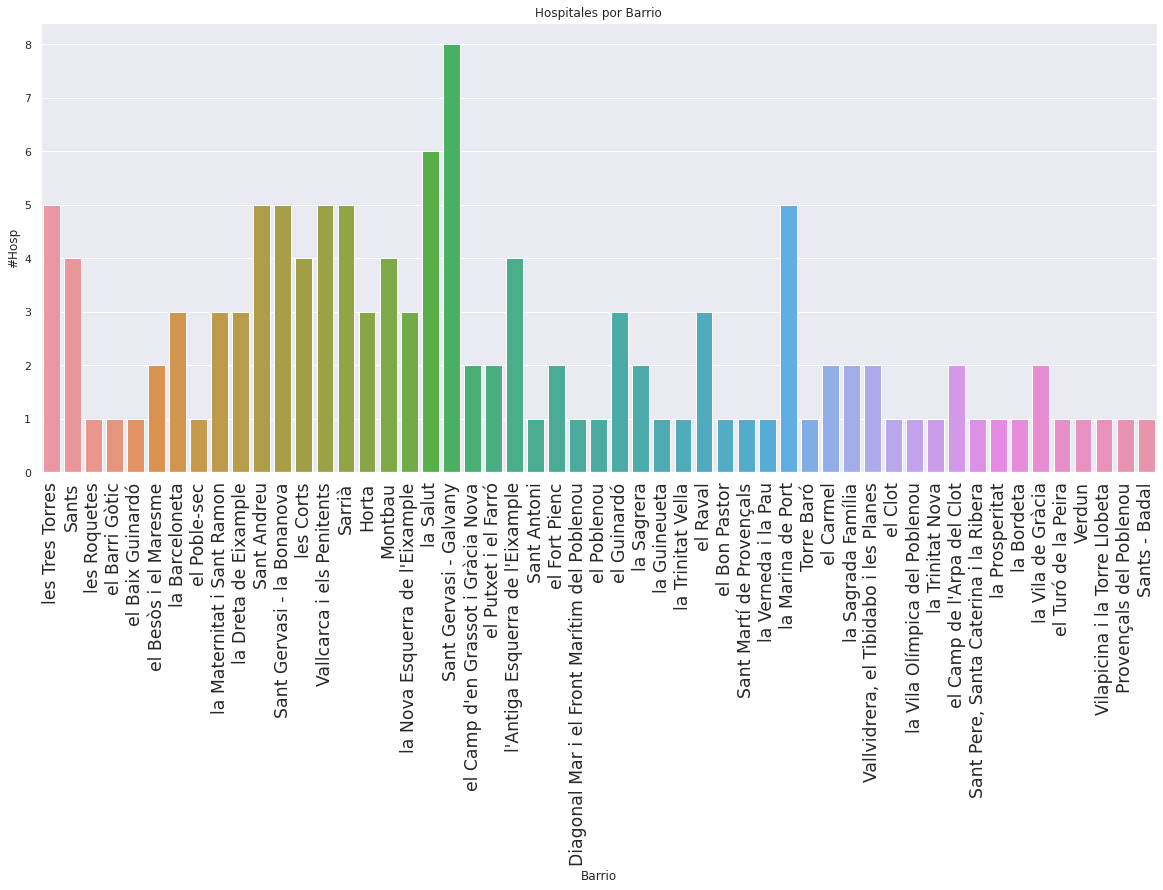

In [25]:
#cantidad de siniestros a por año
ax=sns.countplot('NUM_BARRI',data=Hosp_clean)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize='x-large' )
ax.set_ylabel('#Hosp')
ax.set_xlabel('Barrio')
ax.set_title('Hospitales por Barrio')



In [0]:
#data = Hosp.groupby('NUM_BARRI').filter(lambda x : len(x)>1).groupby('NUM_BARRI').size()
#data

Text(0.5, 1.0, 'Top 10 Hospitales por Barrio')

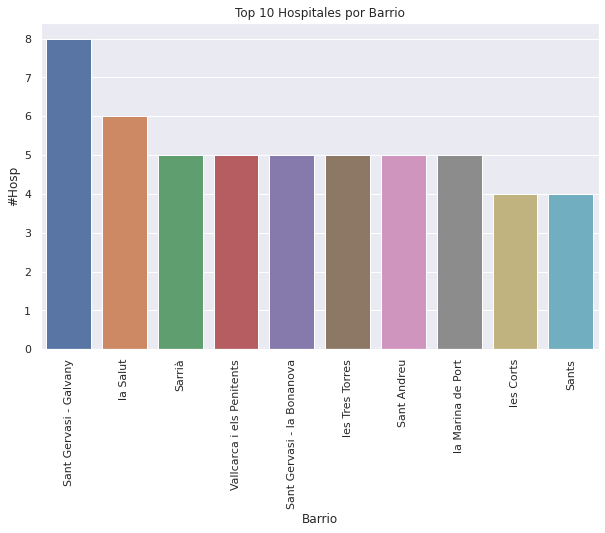

In [27]:
sns.set(rc={'figure.figsize':(10,6)}). # seteamos el tamaño del grafico
ax=Hosp_clean.NUM_BARRI.value_counts().head(10).index
ay=Hosp_clean.NUM_BARRI.value_counts().head(10)
ax=sns.barplot(x=ax,y=ay)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90 )
ax.set_ylabel('#Hosp')
ax.set_xlabel('Barrio')
ax.set_title('Top 10 Hospitales por Barrio')


In [28]:
import folium
from folium.plugins import HeatMap,Fullscreen

#creo mapa de fondo - situado en Barcelona
barcelona_map2 = folium.Map(location=[41.38879, 2.15899], zoom_start=13)

#dataframe con lat y long
heat_df=Hosp_clean[['LATITUD','LONGITUD']]

heat_data=[[row['LATITUD'],row['LONGITUD']] for index,row in heat_df.iterrows() ]

#agrego el mapa de calor al mapa base
HeatMap(heat_data).add_to(barcelona_map2)

#agrego funcionalidad para poder ponerlo en full screen
Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True
).add_to(barcelona_map2)

print('Mapa de Calor ')

barcelona_map2

Mapa de Calor 


In [0]:
import folium
import geocoder   #  geocoder with ArcGIS  <- NOT AVAILABLE ON KAGGLE
from   folium.plugins import MarkerCluster
import geopandas as gpd
import json
import branca.colormap as cm


barce = gpd.read_file('barris.geojson')
geo_json_data = json.load(open('barris.geojson'))

In [30]:
map = folium.Map(location=[41.414206, 2.174385], 
                 #tiles='Stamen Toner',
                 zoom_start=13)
heat_df=Hosp_clean[['LATITUD','LONGITUD']]

heat_data=[[row['LATITUD'],row['LONGITUD']] for index,row in heat_df.iterrows() ]

#agrego el mapa de calor al mapa base
HeatMap(heat_data).add_to(map)

'''
for _,row in Hosp_clean.iterrows():
    lat = row['LATITUD']
    lon = row['LONGITUD']
    name = row['EQUIPAMENT']
    newMarker = folium.Marker([lat,lon], popup=name,
    icon=folium.Icon(color='blue',
                        #icon_color='gray',
                        prefix='fa', 
                        icon='medkit',
                        angle=45)
    )
    newMarker.add_to(map)
'''    
folium.GeoJson(barce, name="geojson").add_to(map)
map

In [31]:
Hosp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 397
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CODI_EQUIPAMENT  125 non-null    int64  
 1   EQUIPAMENT       125 non-null    object 
 2   SECCIO           125 non-null    object 
 3   TIPUS_VIA        125 non-null    object 
 4   NOM_CARRER       125 non-null    object 
 5   NUM_CARRER_1     125 non-null    int64  
 6   NUM_CARRER_2     124 non-null    float64
 7   CODI_BARRI       125 non-null    int64  
 8   NUM_BARRI        125 non-null    object 
 9   CODI_DISTRICTE   125 non-null    int64  
 10  NOM_DISTRICTE    125 non-null    object 
 11  CODI_POSTAL      125 non-null    int64  
 12  LATITUD          125 non-null    float64
 13  LONGITUD         125 non-null    float64
 14  X_ETRS89         125 non-null    float64
 15  Y_ETRS89         125 non-null    float64
 16  X_ED50           125 non-null    float64
 17  Y_ED50          

In [32]:
# add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))


NameError: ignored

In [38]:
map = folium.Map(location=[41.414206, 2.174385], 
                 #tiles='Stamen Toner',
                 zoom_start=13)
heat_df=Hosp_clean[['LATITUD','LONGITUD']]

heat_data=[[row['LATITUD'],row['LONGITUD']] for index,row in heat_df.iterrows() ]

#agrego el mapa de calor al mapa base
HeatMap(heat_data).add_to(map)

folium.GeoJson(barce, name="geojson").add_to(map)

# add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"


folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False).add_to(map)

map

TypeError: ignored

In [39]:

Hosp_per_ne = pd.DataFrame(Hosp_clean['CODI_BARRI'].value_counts().astype(float))
Hosp_per_ne.to_json('Hosp_per_ne.json')
Hosp_per_ne = Hosp_per_ne.reset_index()
Hosp_per_ne.columns = ['BARRI', 'Number']
Hosp_per_ne


,BARRI,Number
0,26,8.0
1,30,6.0
2,23,5.0
3,28,5.0
4,13,5.0
5,60,5.0
6,25,5.0
7,24,5.0
8,40,4.0
9,8,4.0


In [40]:

Hosp_per = pd.DataFrame(Hosp_clean['NUM_BARRI'].value_counts().astype(float))
Hosp_per.to_json('Hosp_per.json')
Hosp_per = Hosp_per.reset_index()
Hosp_per.columns = ['NUM_BARRI', 'Number']
Hosp_per


,NUM_BARRI,Number
0,Sant Gervasi - Galvany,8.0
1,la Salut,6.0
2,Sarrià,5.0
3,Vallcarca i els Penitents,5.0
4,Sant Gervasi - la Bonanova,5.0
5,les Tres Torres,5.0
6,Sant Andreu,5.0
7,la Marina de Port,5.0
8,les Corts,4.0
9,Sants,4.0


In [0]:
map1 = folium.Map(location=[41.414206, 2.174385], 
                 #tiles='Stamen Toner',
                 zoom_start=13)

In [42]:
map1 = folium.Map(location=[41.414206, 2.174385], 
                 #tiles='Stamen Toner',
                 zoom_start=13)
map1.choropleth(geo_data="nyc-zip-codes.geojson",
             data=zipcodes_agg, # my dataset
             columns=['ZIP', 'SALE PRICE'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.postalCode', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='SALE PRICE')


NameError: ignored

Para ponerle texto intentar este codigo = plt.text(x0, y0, id, fontsize=10)

if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)

#Choropleth maps folium

In [43]:
map2 = folium.Map(location=[41.414206, 2.174385], 
                 #tiles='Stamen Toner',
                 zoom_start=13)
map2.choropleth(geo_data=barce,
             data=Hosp_per, # my dataset
             columns=['NUM_BARRI', 'Number'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.NOM', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='YlOrBr', # ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
             highlight=True, 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name='HOSPITALS PER NEIGHBORHOOD'
             )

map2

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [51]:
import folium
from ipywidgets import interact

# Cloudmade Mapbox needs an API key, Mapbox Control Room is limited to a few levels
tiles = [name.strip() for name in """
    OpenStreetMap
    Mapbox Bright
    Mapbox Control Room
    Stamen Toner
    Stamen Watercolor
    CartoDB positron
    CartoDB dark_matter""".strip().split('\n')]

#map1 = folium.Map(location=[41.414206, 2.174385], 
#                 #tiles='Stamen Toner',
#                 zoom_start=13)

@interact(lat=(40., 45.), lon=(2., 3.), tiles=tiles, zoom=(9, 18))

def create_map(lat=41.414206, lon=2.174385, tiles="OpenStreetMap", zoom=10):
    return folium.Map(location=(lat, lon), tiles=tiles, zoom_start=zoom)

interactive(children=(FloatSlider(value=41.414206, description='lat', max=45.0, min=40.0), FloatSlider(value=2…

## Creamos el Dataframe limpio

In [52]:
Hosp_clean.head()

,CODI_EQUIPAMENT,EQUIPAMENT,SECCIO,TIPUS_VIA,NOM_CARRER,NUM_CARRER_1,NUM_CARRER_2,CODI_BARRI,NUM_BARRI,CODI_DISTRICTE,NOM_DISTRICTE,CODI_POSTAL,LATITUD,LONGITUD,X_ETRS89,Y_ETRS89,X_ED50,Y_ED50
0,68125439,Instituto Oftalmológico Tres Torres,#,Via,Augusta,281,285.0,24,les Tres Torres,5,Sarrià-Sant Gervasi,8017,41.397669,2.129943,427268.090,4583268.854,427359.993,4583469.799
2,179151955,Hospital de dia - Numància,#,C,Numància,9,13.0,18,Sants,3,Sants-Montjuïc,8029,41.381424,2.141052,428178.827,4581456.048,428270.739,4581656.976
4,334115716,Centre d'Atenció Primària Roquetes,#,C,Garigliano,23,27.0,50,les Roquetes,8,Nou Barris,8042,41.446174,2.173934,430996.884,4588617.760,431088.820,4588818.755
10,349141404,Centre d'Atenció Primària Gòtic,#,Ptge,Pau,1,1.0,2,el Barri Gòtic,1,Ciutat Vella,8002,41.378814,2.177034,431184.791,4581137.116,431276.731,4581338.042
13,1015170605,Centre d'Atenció Primària Sardenya,#,C,Sardenya,466,466.0,33,el Baix Guinardó,7,Horta-Guinardó,8025,41.409468,2.165567,430258.706,4584549.468,430350.636,4584750.426


Borramos las columnas que no nos interesan

In [0]:
Hosp_clean1 = Hosp_clean

In [54]:
Hosp_clean.drop(['SECCIO'], axis=1)

,CODI_EQUIPAMENT,EQUIPAMENT,TIPUS_VIA,NOM_CARRER,NUM_CARRER_1,NUM_CARRER_2,CODI_BARRI,NUM_BARRI,CODI_DISTRICTE,NOM_DISTRICTE,CODI_POSTAL,LATITUD,LONGITUD,X_ETRS89,Y_ETRS89,X_ED50,Y_ED50
0,68125439,Instituto Oftalmológico Tres Torres,Via,Augusta,281,285.0,24,les Tres Torres,5,Sarrià-Sant Gervasi,8017,41.397669,2.129943,427268.090,4583268.854,427359.993,4583469.799
2,179151955,Hospital de dia - Numància,C,Numància,9,13.0,18,Sants,3,Sants-Montjuïc,8029,41.381424,2.141052,428178.827,4581456.048,428270.739,4581656.976
4,334115716,Centre d'Atenció Primària Roquetes,C,Garigliano,23,27.0,50,les Roquetes,8,Nou Barris,8042,41.446174,2.173934,430996.884,4588617.760,431088.820,4588818.755
10,349141404,Centre d'Atenció Primària Gòtic,Ptge,Pau,1,1.0,2,el Barri Gòtic,1,Ciutat Vella,8002,41.378814,2.177034,431184.791,4581137.116,431276.731,4581338.042
13,1015170605,Centre d'Atenció Primària Sardenya,C,Sardenya,466,466.0,33,el Baix Guinardó,7,Horta-Guinardó,8025,41.409468,2.165567,430258.706,4584549.468,430350.636,4584750.426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,99400429814,Hospital de Dia Còrsega,Ptge,Còrsega,20,20.0,64,el Camp de l'Arpa del Clot,10,Sant Martí,8026,41.410651,2.178658,431354.086,4584670.349,431446.026,4584871.308
387,99400486709,Centre d'Atenció Primària Vila de Gràcia-Cibeles,C,Còrsega,363,363.0,31,la Vila de Gràcia,6,Gràcia,8037,41.398698,2.162003,429949.239,4583356.596,430041.167,4583557.542
391,99400591673,Instituto de Trastornos Alimentarios,C,Avenir,14,NaN,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,8006,41.397073,2.148828,428846.103,4583186.964,428938.021,4583387.909
396,99400607886,Clínica Podològica Integral,Pg,Zona Franca,242,242.0,13,la Marina de Port,3,Sants-Montjuïc,8038,41.363372,2.137021,427821.815,4579455.344,427913.724,4579656.254


In [59]:
Hosp_clean.sort_values(by=['NUM_BARRI'])

,CODI_EQUIPAMENT,EQUIPAMENT,SECCIO,TIPUS_VIA,NOM_CARRER,NUM_CARRER_1,NUM_CARRER_2,CODI_BARRI,NUM_BARRI,CODI_DISTRICTE,NOM_DISTRICTE,CODI_POSTAL,LATITUD,LONGITUD,X_ETRS89,Y_ETRS89,X_ED50,Y_ED50
104,92086001793,Centre d'Atenció Primària Ramon Turró,#,C,Ramon Turró,337,339.0,69,Diagonal Mar i el Front Marítim del Poblenou,10,Sant Martí,8019,41.406334,2.211231,434072.160,4584165.754,434164.125,4584366.709
371,99400284987,Centre d'Urgències d'Atenció Primària Horta,#,C,Sant Gaudenci,21,21.0,43,Horta,7,Horta-Guinardó,8031,41.434840,2.157438,429606.678,4587372.800,429698.601,4587573.784
52,75990127413,Residència Sociosanitaria Assistida Psicoclíni...,#,Pg,Universal,34,34.0,43,Horta,7,Horta-Guinardó,8042,41.437876,2.161999,429990.988,4587706.157,430082.915,4587907.144
213,92086029435,Hospital Mare de Déu de la Mercè,#,Pg,Universal,34,44.0,43,Horta,7,Horta-Guinardó,8042,41.437876,2.161999,429990.988,4587706.157,430082.915,4587907.144
181,92086005523,Vall dHebron Barcelona Hospital Campus,#,Pg,Vall d'Hebron,119,129.0,40,Montbau,7,Horta-Guinardó,8035,41.428049,2.143458,428431.222,4586630.315,428523.135,4586831.291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,75990029810,Clínica Corachan,#,C,Buïgas,19,19.0,24,les Tres Torres,5,Sarrià-Sant Gervasi,8017,41.393522,2.130756,427331.391,4582807.781,427423.295,4583008.722
352,99400187136,Clinica del Son Estivill,#,C,Rosales,9,9.0,24,les Tres Torres,5,Sarrià-Sant Gervasi,8017,41.401672,2.128546,427155.771,4583714.397,427247.673,4583915.346
36,75990049258,Clínica Mi Tres Torres,#,C,Doctor Roux,76,76.0,24,les Tres Torres,5,Sarrià-Sant Gervasi,8017,41.399249,2.128868,427180.003,4583445.077,427271.905,4583646.023
38,75990051869,Institut Català de Retina - Sarrià,#,C,Ganduxer,117,117.0,24,les Tres Torres,5,Sarrià-Sant Gervasi,8022,41.401751,2.132211,427462.193,4583720.043,427554.098,4583920.992


In [67]:
number_Hosp=Hosp_clean[["NUM_BARRI", "EQUIPAMENT",'CODI_BARRI',"LATITUD","LONGITUD",'X_ETRS89','Y_ETRS89']].groupby(["NUM_BARRI"],as_index=False).agg({"EQUIPAMENT":"count",'CODI_BARRI':lambda x: x.iloc[0],"LATITUD":lambda x: x.iloc[0],"LONGITUD":lambda x: x.iloc[0],"X_ETRS89":lambda x: x.iloc[0] ,"Y_ETRS89":lambda x: x.iloc[0] }).sort_values("EQUIPAMENT", ascending=False).reset_index(drop=True)
number_Hosp


,NUM_BARRI,EQUIPAMENT,CODI_BARRI,LATITUD,LONGITUD,X_ETRS89,Y_ETRS89
0,Sant Gervasi - Galvany,8,26,41.401136,2.141224,428214.959,4583644.281
1,la Salut,6,30,41.408839,2.149860,428945.249,4584492.420
2,les Tres Torres,5,24,41.397669,2.129943,427268.090,4583268.854
3,la Marina de Port,5,13,41.358293,2.144328,428427.478,4578885.433
4,Vallcarca i els Penitents,5,28,41.414037,2.142642,428347.676,4585075.408
5,Sant Gervasi - la Bonanova,5,25,41.412510,2.136103,427799.428,4584911.303
6,Sarrià,5,23,41.399338,2.115652,426075.324,4583466.231
7,Sant Andreu,5,60,41.436758,2.193086,432586.956,4587557.371
8,Sants,4,18,41.381424,2.141052,428178.827,4581456.048
9,l'Antiga Esquerra de l'Eixample,4,8,41.391325,2.159845,429760.900,4582539.858


## Referencias

https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib

https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/GeoJSON_and_choropleth.ipynb

https://towardsdatascience.com/using-folium-to-generate-choropleth-map-with-customised-tooltips-12e4cec42af2

Comuna Santiago :
https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

España Cholopleth maps: https://towardsdatascience.com/choropleth-maps-with-folium-1a5b8bcdd392

Interactivos : https://nbviewer.jupyter.org/github/python-visualization/folium_contrib/blob/master/notebooks/HereMapsApiExplorer_no_creds.ipynb

Crear Clsuters : https://medium.com/@saidakbarp/interactive-map-visualization-with-folium-in-python-2e95544d8d9b